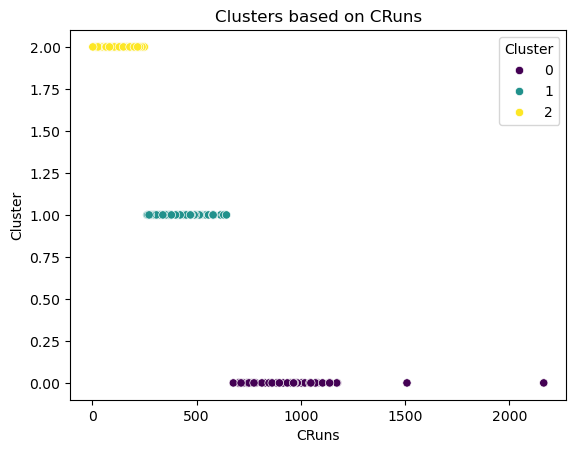

   CRuns  Cluster
1    321        1
2    224        2
3    828        0
4     48        2
5    501        1


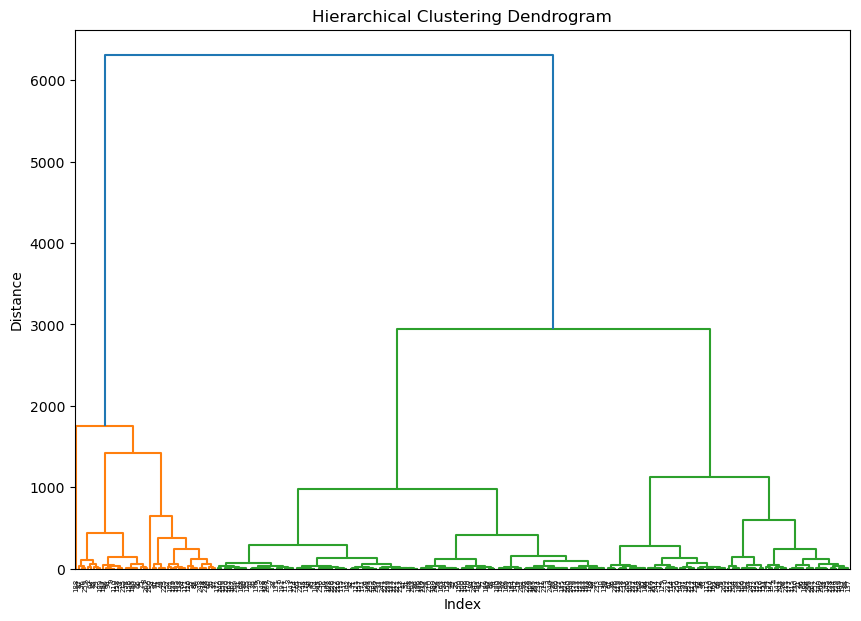

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_csv('./Datasets/Hitters.csv')

# Handle missing data
data = data.dropna()  # Drop rows with missing values

# Label Encoding for categorical columns
label_encoder = LabelEncoder()

# Encode 'League', 'Division', and 'NewLeague' columns
data['League'] = label_encoder.fit_transform(data['League'])
data['Division'] = label_encoder.fit_transform(data['Division'])
data['NewLeague'] = label_encoder.fit_transform(data['NewLeague'])

# Select the relevant features for clustering (we focus on CRuns column as mentioned)
X = data[['CRuns']].values

# Perform Hierarchical Clustering (no need for affinity='euclidean' when using 'ward' linkage)
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Cluster'] = model.fit_predict(X)

# Optionally, visualize the clusters
sns.scatterplot(x=data['CRuns'], y=data['Cluster'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters based on CRuns')
plt.xlabel('CRuns')
plt.ylabel('Cluster')
plt.show()

# Display the clustered data
print(data[['CRuns', 'Cluster']].head())

# Plotting the dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()